# Ciencia de datos 2022

## Alan Reyes-Figueroa

# Factoración no negativa de matrices (NNMF)

En este experimento ilustramos cómo funciona un sistema de recomendación (*toy example*).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import NMF

import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
X1 = np.array([[0,1,0,1,2,2],
               [2,3,1,1,2,2],
               [1,1,1,0,1,1],
               [0,2,3,4,1,1],
               [0,0,0,0,1,0]])

X2 = np.array([[0,1,0,1,2,2],
               [2,3,0,1,2,2],
               [1,1,0,0,1,1],
               [0,2,3,4,1,1],
               [0,0,0,0,1,0],
               [0,0,2,0,2,2],
               [2,1,0,2,0,1],
               [0,3,1,1,1,0],
               [0,3,2,2,1,0]])

## Experimento 1

In [3]:
names = ['Alice', 'Bob', 'Cadú', 'Didier', 'Ely', 'Fabi']
D1 = pd.DataFrame(X1, columns=names)
D1.index = ['Vegetales', 'Frutas', 'Dulces', 'Pan', 'Café']

In [4]:
D1

,Alice,Bob,Cadú,Didier,Ely,Fabi
Vegetales,0,1,0,1,2,2
Frutas,2,3,1,1,2,2
Dulces,1,1,1,0,1,1
Pan,0,2,3,4,1,1
Café,0,0,0,0,1,0


In [5]:
k = 3            # número de clústers

nmf = NMF(k)     # NNMF
nmf.fit(D1)      # training u optimización

NMF(n_components=3)

In [6]:
H = nmf.components_
W = nmf.transform(D1)
print(W. shape, H.shape)

(5, 3) (3, 6)


In [7]:
W = pd.DataFrame(np.round(W, 4), columns=np.arange(0, k))
W.index = D1.index

In [8]:
W

,0,1,2
Vegetales,0.0030,0.0372,2.7447
Frutas,1.9272,0.1525,0.4676
Dulces,0.9736,0.0003,0.0000
Pan,0.0003,2.6569,1.1803
Café,0.0000,0.0000,0.5900


In [9]:
# mostramos W con mapa de colores

WW = W.style.background_gradient(cmap=plt.cm.Blues)
display(WW)

,0,1,2
Vegetales,0.003000,0.037200,2.744700
Frutas,1.927200,0.152500,0.467600
Dulces,0.973600,0.000300,0.000000
Pan,0.000300,2.656900,1.180300
Café,0.000000,0.000000,0.590000


In [10]:
display(W.T.corr().style.background_gradient(cmap=plt.cm.seismic))

,Vegetales,Frutas,Dulces,Pan,Café
Vegetales,1.000000,-0.359096,-0.509614,-0.053474,0.999941
Frutas,-0.359096,1.000000,0.986015,-0.912763,-0.348930
Dulces,-0.509614,0.986015,1.000000,-0.831921,-0.500231
Pan,-0.053474,-0.912763,-0.831921,1.000000,-0.064326
Café,0.999941,-0.348930,-0.500231,-0.064326,1.000000


In [11]:
H = pd.DataFrame(np.round(nmf.components_, 3), columns=D1.columns)
#H.index = ['Veggies', 'Meat lovers', 'Bread eaters', 'Yogurth pickers']
H.index = ['Fruits pickers', 'Bread eaters',  'Veggies']

In [12]:
HH = H.style.background_gradient(cmap=plt.cm.Blues)
display(HH)

,Alice,Bob,Cadú,Didier,Ely,Fabi
Fruits pickers,1.036000,1.344000,0.551000,0.263000,0.885000,0.898000
Bread eaters,0.000000,0.602000,1.124000,1.359000,0.034000,0.068000
Veggies,0.000000,0.347000,0.000000,0.337000,0.767000,0.691000


## Experimento 2

In [13]:
D2 = pd.DataFrame(X2, columns=names)
D2.index = ['Vegetales', 'Frutas', 'Dulces', 'Pan', 'Café', 'Carnes', 'Lácteos', 'Pastas', 'Salsa']

In [14]:
D2

,Alice,Bob,Cadú,Didier,Ely,Fabi
Vegetales,0,1,0,1,2,2
Frutas,2,3,0,1,2,2
Dulces,1,1,0,0,1,1
Pan,0,2,3,4,1,1
Café,0,0,0,0,1,0
Carnes,0,0,2,0,2,2
Lácteos,2,1,0,2,0,1
Pastas,0,3,1,1,1,0
Salsa,0,3,2,2,1,0


In [15]:
k = 7
nmf = NMF(k)
nmf.fit(D2)

NMF(n_components=7)

In [16]:
H = nmf.components_
W = nmf.transform(D2)
print(W. shape, H.shape)

(9, 7) (7, 6)


In [17]:
W = pd.DataFrame(np.round(W, 4), columns=np.arange(0, k))
W.index = D2.index

In [18]:
W

,0,1,2,3,4,5,6
Vegetales,1.0039,0.0000,0.0001,2.0291,0.0000,0.0000,0.8849
Frutas,4.1758,0.0000,1.1658,1.0556,0.0000,0.4243,0.8808
Dulces,1.5675,0.0000,0.5829,0.5399,0.0000,0.2230,0.0000
Pan,0.3919,1.9677,0.0004,0.9847,0.0001,0.0000,1.4617
Café,0.0000,0.0000,0.0000,0.0000,0.0000,0.5701,0.0000
Carnes,0.0000,0.0019,0.0000,0.0067,1.5839,0.0039,0.0000
Lácteos,0.0000,0.0000,1.1664,0.0018,0.0000,0.0000,1.7724
Pastas,4.4393,0.6560,0.0000,0.0000,0.0000,0.4142,0.1860
Salsa,3.6487,1.3120,0.0000,0.0000,0.0000,0.4339,0.3788


In [19]:
WW = W.style.background_gradient(cmap=plt.cm.Blues)
display(WW)

,0,1,2,3,4,5,6
Vegetales,1.003900,0.000000,0.000100,2.029100,0.000000,0.000000,0.884900
Frutas,4.175800,0.000000,1.165800,1.055600,0.000000,0.424300,0.880800
Dulces,1.567500,0.000000,0.582900,0.539900,0.000000,0.223000,0.000000
Pan,0.391900,1.967700,0.000400,0.984700,0.000100,0.000000,1.461700
Café,0.000000,0.000000,0.000000,0.000000,0.000000,0.570100,0.000000
Carnes,0.000000,0.001900,0.000000,0.006700,1.583900,0.003900,0.000000
Lácteos,0.000000,0.000000,1.166400,0.001800,0.000000,0.000000,1.772400
Pastas,4.439300,0.656000,0.000000,0.000000,0.000000,0.414200,0.186000
Salsa,3.648700,1.312000,0.000000,0.000000,0.000000,0.433900,0.378800


In [20]:
display(W.T.corr().style.background_gradient(cmap=plt.cm.seismic))

,Vegetales,Frutas,Dulces,Pan,Café,Carnes,Lácteos,Pastas,Salsa
Vegetales,1.000000,0.413037,0.388299,0.263646,-0.313655,-0.311727,-0.021165,0.187620,0.122146
Frutas,0.413037,1.000000,0.958917,-0.192280,-0.207433,-0.339042,-0.049166,0.903813,0.820137
Dulces,0.388299,0.958917,1.000000,-0.314498,-0.150372,-0.324727,-0.216495,0.851010,0.755354
Pan,0.263646,-0.192280,-0.314498,1.000000,-0.378907,-0.378736,0.162200,-0.078411,0.094285
Café,-0.313655,-0.207433,-0.150372,-0.378907,1.000000,-0.165325,-0.251052,-0.108854,-0.129648
Carnes,-0.311727,-0.339042,-0.324727,-0.378736,-0.165325,1.000000,-0.253360,-0.223278,-0.275210
Lácteos,-0.021165,-0.049166,-0.216495,0.162200,-0.251052,-0.253360,1.000000,-0.287974,-0.298005
Pastas,0.187620,0.903813,0.851010,-0.078411,-0.108854,-0.223278,-0.287974,1.000000,0.977065
Salsa,0.122146,0.820137,0.755354,0.094285,-0.129648,-0.275210,-0.298005,0.977065,1.000000


In [21]:
H = pd.DataFrame(np.round(H, 4), columns=D2.columns)
#H.index = ['Veggies', 'Meat lovers', 'Bread eaters', 'Yogurth pickers']
#H.index = ['Fruits pickers', 'Bread eaters',  'Veggies']
#H.index = ['Veggies', 'Meat lovers', 'Bread eaters', 'Yogurth pickers']
#H.index = ['Veggies', 'Meat lovers', 'Bread eaters', 'Yogurth pickers']
H.index = ['Italians', 'Fruit pickers', 'Meat lovers', 'Yogurth pickers', 'Bread eaters', 'Veggies', '?']

In [22]:
HH = H.style.background_gradient(cmap=plt.cm.Blues)
display(HH)

,Alice,Bob,Cadú,Didier,Ely,Fabi
Italians,0.000000,0.574200,0.000000,0.001500,0.058900,0.000000
Fruit pickers,0.000000,0.557700,1.524500,1.194300,0.018400,0.000000
Meat lovers,1.715400,0.162700,0.000000,0.000000,0.000000,0.813600
Yogurth pickers,0.000000,0.009300,0.000000,0.000000,0.956700,0.973700
Bread eaters,0.000000,0.000000,1.259900,0.000000,1.254400,1.259700
Veggies,0.000400,0.000000,0.000000,0.000000,1.754200,0.000000
?,0.000000,0.457100,0.000000,1.128400,0.000000,0.026800


<Figure size 432x288 with 0 Axes>

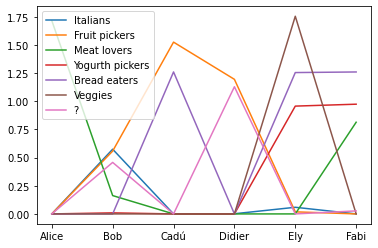

In [23]:
# otra forma de visualizar los pesos de cada persona en cada categoría
plt.figure()
#plt.imshow(H, cmap=plt.cm.jet)
H.T.plot()
plt.show()

In [24]:
approX = W.values @ H.values
reconstructed = pd.DataFrame(np.round(approX, 3), columns=D2.columns)
reconstructed.index = D2.index

In [25]:
# Sistema de recomendación

display(reconstructed)

,Alice,Bob,Cadú,Didier,Ely,Fabi
Vegetales,0.000,1.000,0.000,1.000,2.000,2.000
Frutas,2.000,3.000,0.000,1.000,2.000,2.000
Dulces,1.000,1.000,0.000,0.002,1.000,1.000
Pan,0.001,2.000,3.000,4.000,1.001,0.998
Café,0.000,0.000,0.000,0.000,1.000,0.000
Carnes,0.000,0.001,1.998,0.002,2.000,2.002
Lácteos,2.001,1.000,0.000,2.000,0.002,0.998
Pastas,0.000,3.000,1.000,1.000,1.000,0.005
Salsa,0.000,3.000,2.000,2.000,1.000,0.010


## Error en función de k

In [26]:
Hs = []
Ws = []
Xs = []
errs = []

for k in range(1, 1+D2.shape[1]):
    nmf = NMF(k)
    nmf.fit(D2)
    H = nmf.components_
    W = nmf.transform(D2)
    X = W @ H
    err = ((D2.values - X)**2).sum()
    
    Hs.append(H)
    Ws.append(W)
    Xs.append(X)
    errs.append(err)

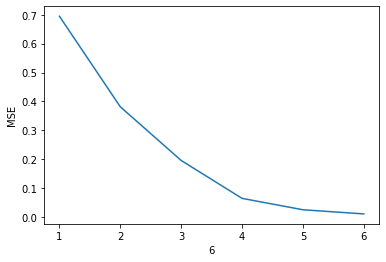

In [27]:
plt.figure()
plt.plot(np.arange(1,1+D2.shape[1]), errs /np.prod(D2.shape))
plt.xlabel(k)
plt.ylabel('MSE')
plt.show()

In [28]:
k = 6
nmf = NMF(k)
nmf.fit(D2)

NMF(n_components=6)